### Import Library
___
Melakukan import library yang diperlukan
* pandas : manipulasi dan analisis data
* numpy : komputasi numerik 
* sklearn.preprocessing : praproses data untuk melakukan penskalaan fitur
* sklearn.linear_model : implementasi algoritma, seperti Linear Regression
* sklearn.metrics : metrik evaluasi kinerja model
* matplotlib : membuat visualisasi data dengan grafik
* seaborn : membuat visualisasi data yang dibangun dari matplotlib
* joblib : menyimpan model dan scaler

In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### Dataset
___
Mengambil dataset dari file CSV yang akan digunakan untuk train dan test

In [207]:
data_train = pd.read_csv('[Dataset]_Train_(Keryawan).csv')
data_test = pd.read_csv('[Dataset]_Test_(Karyawan).csv')

### Cleaning Data
___
Menghapus baris yang memiliki nilai NaN

In [208]:
data_train.dropna()
data_test.dropna()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,EID_6891,M,47.0,3,Married,Franklin,Operarions,Behavioral,15.0,2,...,9.0,type2,3.0,3,-0.9612,0.7075,2.0,2,6,4
2993,EID_10639,F,35.0,4,Single,Washington,Marketing,Conceptual,12.0,3,...,6.0,type2,3.0,3,0.7516,0.7075,2.0,4,7,3
2995,EID_22547,F,32.0,3,Single,Franklin,Sales,Directive,3.0,3,...,6.0,type2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2998,EID_4929,F,51.0,1,Married,Springfield,IT,Behavioral,23.0,1,...,6.0,type3,1.0,5,0.7516,-0.4537,2.0,3,9,2


### Memisahkan Fitur dan Target
___
Untuk memisahkan fitur yang akan digunakan sebagai dasar yang digunakan untuk melakukan prediksi target

In [209]:
X_train = data_train.drop(columns=['Employee_ID', 'Attrition_rate'])
y_train = data_train['Attrition_rate']
X_test = data_test.drop(columns=['Employee_ID'])

### Visualisasi Data
___
Melakukan visualisasi data dengan histogram dan heatmap untuk melihat distribusi data yang merupakan fitur

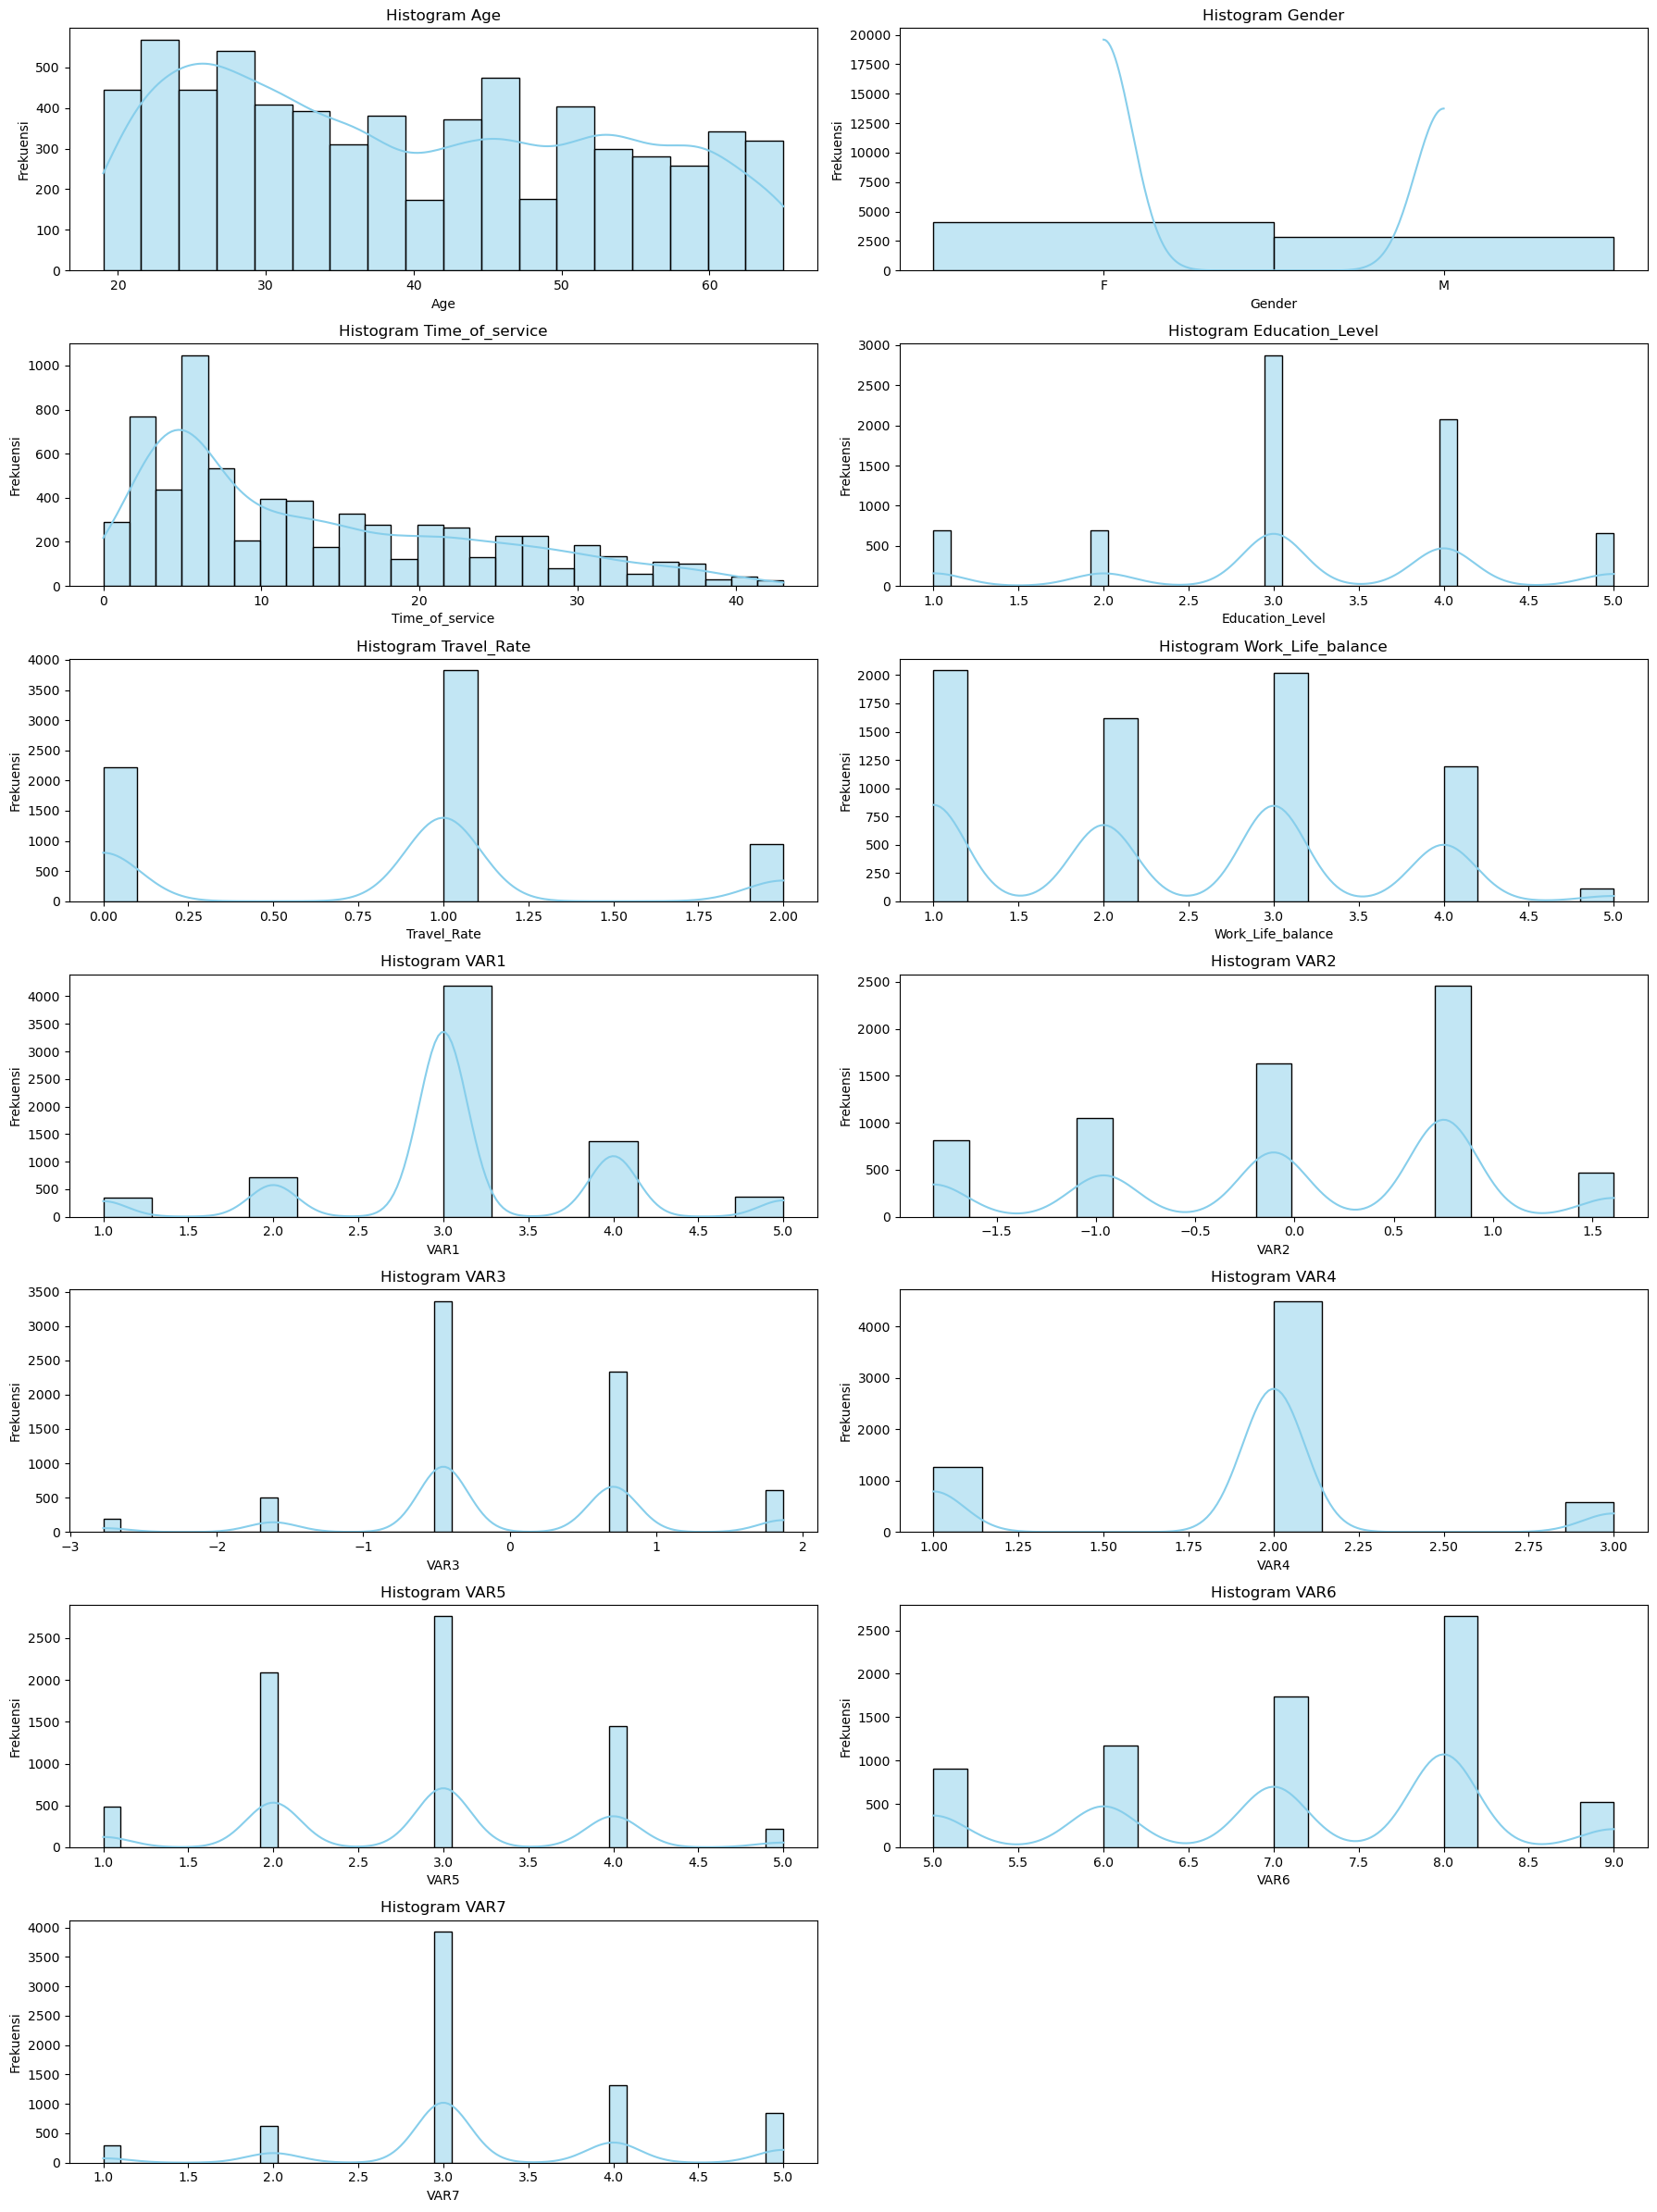

In [210]:
features = ['Age','Gender','Time_of_service','Education_Level', 'Travel_Rate', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']
plt.figure(figsize=(18, 24))  # Menyesuaikan ukuran untuk menampung semua subplot
rows = 7
cols = 2
for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data_train[feature], kde=True, color='skyblue')
    plt.title(f'Histogram {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

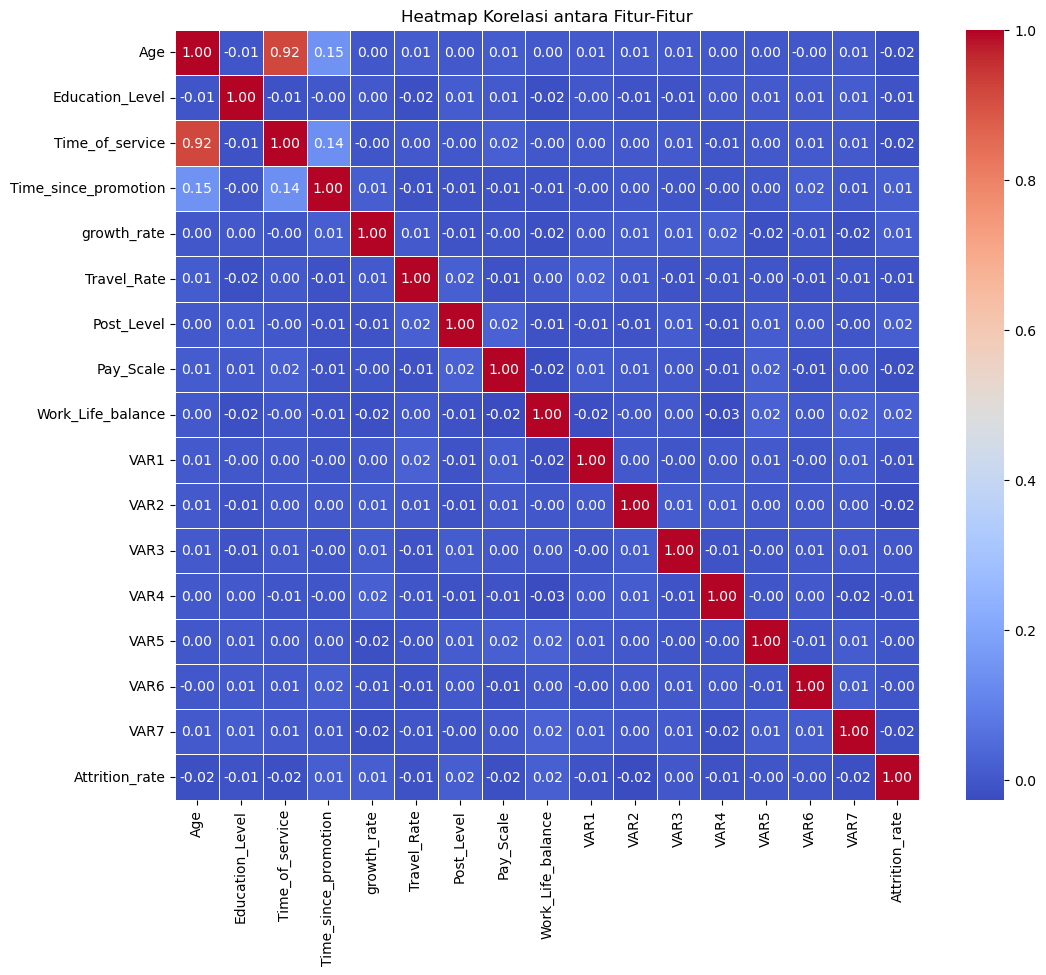

In [211]:
# Hitung korelasi antara fitur-fitur
correlation_matrix = data_train.corr()

# Buat heatmap dari korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi antara Fitur-Fitur')
plt.show()

### Label Encoding
___
Mengubah data kategorikal menjadi numerik agar dapat digunakan untuk train

In [212]:
label_encoder = LabelEncoder()
kategorikal = ['Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits', 'Relationship_Status','Gender']
for col in kategorikal:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

### Mengecek Nilai
___
Mengecek nilai yang ada tidak terlalu besar atau kecil atau masih NaN

In [213]:
X_train = pd.DataFrame(np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0), columns=X_train.columns)
X_test = pd.DataFrame(np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0), columns=X_test.columns)

### Normalisasi Data
___
Mengubah nilai-nilai pada dataset sehingga memiliki rata-rata 0 dengan varians 1

In [214]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Membuat dan Melatih Model
___
Membuat model menggunakan algoritma Linear Regression (LR) karena program ini digunakan untuk membuat prediksi mengenai tingkat attrisi karyawan sehingga penggunaan algoritma tersebut cocok karena interprestasinya yang mudah 


In [215]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Menyimpan Model dan Scaler
___
Menyimpan model dan scaler untuk menyimpan hasil pelatihan sehingga dapat digunakan pada interface 

In [216]:
joblib.dump(model, 'attrition_model.pkl')
joblib.dump(scaler, 'attrition_scaler.pkl')


['attrition_scaler.pkl']

### Membuat Prediksi
___
Membuat prediksi dari hasil train model

In [217]:
y_pred = model.predict(X_test_scaled)

### Evaluasi Kinerja Model
___
Melakukan evaluasi kinerja model dengan Mean Squared Error (MSE) karena MSE sensitif pada perbedaan nilai hasil prediksi dengan nilai aslinya sehingga dapat digunakan untuk menghitung akurasi model

In [218]:
y_train_pred = model.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on training data: {mse}")

Mean Squared Error on training data: 0.03430984043277887


### Menyimpan Hasil Prediksi
___
Menyimpan hasil prediksi pada file CSV baru

In [219]:
# Menampilkan hasil prediksi
predictions_df = pd.DataFrame({'Employee_ID': data_test['Employee_ID'], 'Predicted_Attrition_rate': y_pred})
print(predictions_df)

# Simpan hasil prediksi ke dalam file CSV
predictions_df.to_csv('hasil_prediksi_attrition.csv', index=False)

     Employee_ID  Predicted_Attrition_rate
0      EID_22713                  0.205655
1       EID_9658                  0.197341
2      EID_22203                  0.190874
3       EID_7652                  0.218729
4       EID_6516                  0.198769
...          ...                       ...
2995   EID_22547                  0.203007
2996   EID_10066                  0.178207
2997    EID_7126                  0.168544
2998    EID_4929                  0.160604
2999   EID_24750                  0.191358

[3000 rows x 2 columns]


### Menghitung Akurasi
___
Menghitung akurasi dari model diatas dalam bentuk persentase

In [220]:
akurasi=100 * (1 - mse)
print(f"Akurasi model: {akurasi:.2f}%")


Akurasi model: 96.57%
